In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Provide the correct path to your file
file_path = r"C:\Users\ASUS\OneDrive\Desktop\Malkin work\merged_data_1901_to_2022.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

        Date    Day    Year  Month Location  Rainfall (in mm)  Latitude  \
0 1901-01-01  Day_1  1901.0    1.0    Loc_0               3.0     27.25   
1 1901-01-02  Day_2  1901.0    1.0    Loc_0               8.0     27.25   
2 1901-01-03  Day_3  1901.0    1.0    Loc_0               0.0     27.25   
3 1901-01-04  Day_4  1901.0    1.0    Loc_0               0.0     27.25   
4 1901-01-05  Day_5  1901.0    1.0    Loc_0               0.0     27.25   

   Longitude  Quarter  
0      88.25      1.0  
1      88.25      1.0  
2      88.25      1.0  
3      88.25      1.0  
4      88.25      1.0  


In [3]:
data.shape

(669680, 9)

In [5]:
data['class'] = data['Rainfall (in mm)'].apply(lambda x : 1 if x > 0 else 0)
data.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,class
0,1901-01-01,Day_1,1901.0,1.0,Loc_0,3.0,27.25,88.25,1.0,1
1,1901-01-02,Day_2,1901.0,1.0,Loc_0,8.0,27.25,88.25,1.0,1
2,1901-01-03,Day_3,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0
3,1901-01-04,Day_4,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0
4,1901-01-05,Day_5,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0


In [44]:
data.isnull().sum()

Date                121
Day                 121
Year                121
Month               121
Location              0
Rainfall (in mm)    121
Latitude              0
Longitude             0
Quarter             121
class                 0
Year-Month-Day      121
dtype: int64

In [45]:
data = data.dropna()
data.isnull().sum()

Date                0
Day                 0
Year                0
Month               0
Location            0
Rainfall (in mm)    0
Latitude            0
Longitude           0
Quarter             0
class               0
Year-Month-Day      0
dtype: int64

In [47]:
data['class'].value_counts()

class
1    360925
0    308634
Name: count, dtype: int64

In [48]:
jan = data[data['Month'] == 1.0]
jan.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,class,Year-Month-Day
0,1901-01-01,Day_1,1901.0,1.0,Loc_0,3.0,27.25,88.25,1.0,1,1901-01-01
1,1901-01-02,Day_2,1901.0,1.0,Loc_0,8.0,27.25,88.25,1.0,1,1901-01-02
2,1901-01-03,Day_3,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-03
3,1901-01-04,Day_4,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-04
4,1901-01-05,Day_5,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-05


In [49]:
jan_rainfall = jan.groupby(['Location'])['Rainfall (in mm)'].sum().reset_index()
jan_rainfall

,Location,Rainfall (in mm)
0,Loc_0,2633.0
1,Loc_1,2609.0
2,Loc_10,3829.4
3,Loc_2,2141.2
4,Loc_3,4365.4
5,Loc_4,3874.0
6,Loc_5,3241.0
7,Loc_6,4352.4
8,Loc_7,3994.8
9,Loc_8,3640.8


<Axes: xlabel='Location', ylabel='Rainfall (in mm)'>

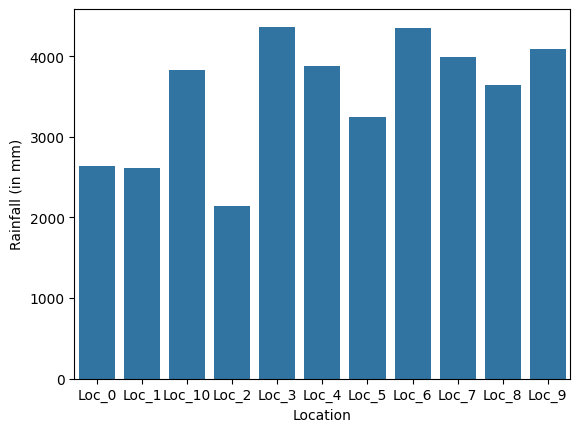

In [50]:
sns.barplot(x='Location', y='Rainfall (in mm)', data=jan_rainfall)

**We can see that location 3 and 6 experience the most rainfall in the month of janurary follwered by location 9 8 and 4**

<Axes: xlabel='Year', ylabel='Rainfall (in mm)'>

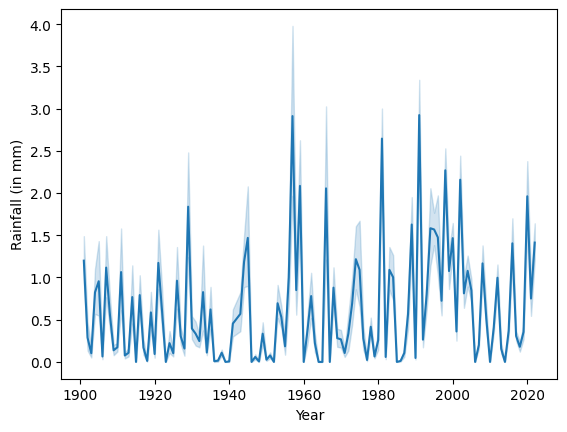

In [51]:
sns.lineplot(jan , x = 'Year',y = 'Rainfall (in mm)')

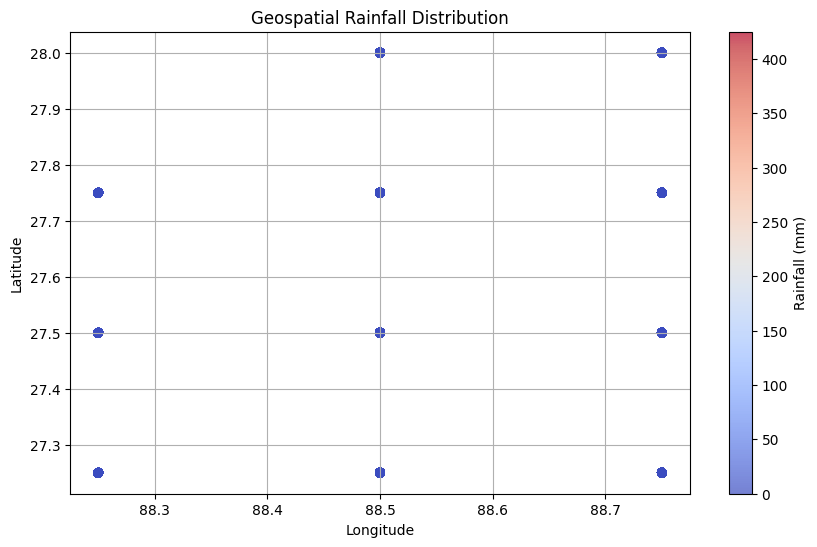

In [52]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data["Longitude"], data["Latitude"], c=data["Rainfall (in mm)"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geospatial Rainfall Distribution")
plt.colorbar(scatter, label="Rainfall (mm)")
plt.grid(True)
plt.show()

In [53]:
import geopandas as gpd

# Load the shapefile
file_path = file_path = r"C:\Users\ASUS\OneDrive\Desktop\Malkin work\States level 1.shp.zip"

gdf = gpd.read_file(file_path)

# Check available columns
print(gdf.columns)
gdf

Index(['shape1', 'shapeiso', 'shapeid', 'shapegroup', 'shapetype', 'shape0',
       'geometry'],
      dtype='object')


,shape1,shapeiso,shapeid,shapegroup,shapetype,shape0,geometry
0,Puducherry,IN-PY,1811400B81659894240990,IND,ADM1,india,"MULTIPOLYGON (((75.53056 11.70403, 75.53227 11..."
1,Maharashtra,IN-MH,1811400B15614733245507,IND,ADM1,india,"MULTIPOLYGON (((80.27289 18.72299, 80.27229 18..."
2,Nagaland,IN-NL,1811400B74762431478096,IND,ADM1,india,"POLYGON ((95.23392 26.68246, 95.23355 26.68174..."
3,Lakshadweep,IN-LD,1811400B55669546485086,IND,ADM1,india,"MULTIPOLYGON (((73.01113 8.27759, 73.01124 8.2..."
4,Uttar Pradesh,IN-UP,1811400B11231190780494,IND,ADM1,india,"MULTIPOLYGON (((79.39526 25.03209, 79.39496 25..."
5,Tamil Nadu,IN-TN,1811400B21167269026319,IND,ADM1,india,"MULTIPOLYGON (((79.48966 9.12061, 79.49101 9.1..."
6,Chhattisgarh,IN-CT,1811400B70654311394581,IND,ADM1,india,"POLYGON ((80.27289 18.72299, 80.27266 18.72334..."
7,Gujarat,IN-GJ,1811400B80305611676067,IND,ADM1,india,"MULTIPOLYGON (((71.15113 20.76011, 71.15176 20..."
8,Delhi,IN-DL,1811400B23625213884851,IND,ADM1,india,"POLYGON ((77.20984 28.85787, 77.20995 28.85784..."
9,Sikkim,IN-SK,1811400B15456792557830,IND,ADM1,india,"POLYGON ((88.01482 27.21171, 88.01412 27.21252..."


In [54]:
# Display unique state names
print(gdf["shape1"].unique())  # Column name may vary

['Puducherry' 'Maharashtra' 'Nagaland' 'Lakshadweep' 'Uttar Pradesh'
 'Tamil Nadu' 'Chhattisgarh' 'Gujarat' 'Delhi' 'Sikkim']


In [55]:
# Filter Sikkim
sikkim_gdf = gdf[gdf["shape1"] == "Sikkim"]  # Adjust column name if necessary

# Save as a new Shapefile

sikkim_gdf.to_file('sikkim.shp')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\3926857294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\3926857294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year-Month-Day"] = data["Date"].dt.strftime("%Y-%m-%d")


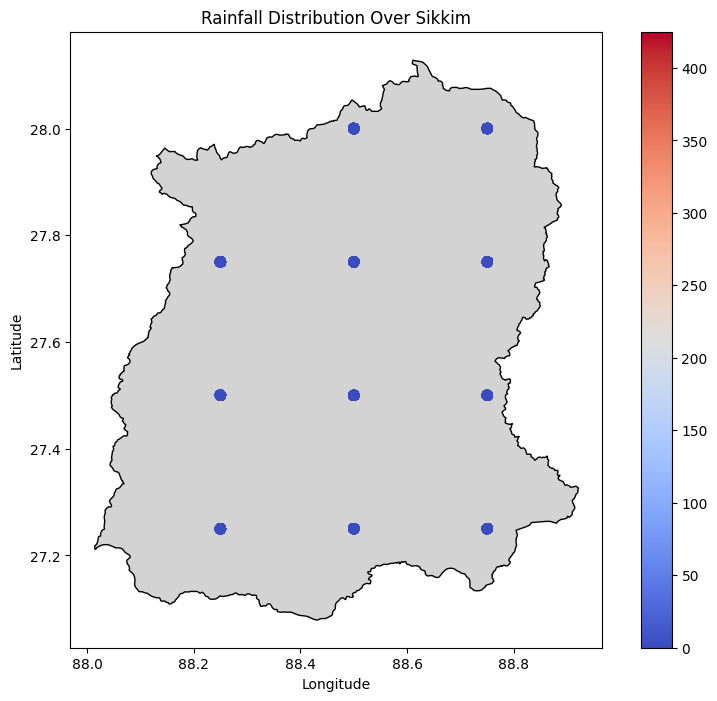

In [56]:
# Convert Date column to datetime format
data["Date"] = pd.to_datetime(data["Date"])
data["Year-Month-Day"] = data["Date"].dt.strftime("%Y-%m-%d")

# Load Sikkim Shapefile (Update the path accordingly)
sikkim_shapefile = sikkim_shapefile = r"C:\Users\ASUS\OneDrive\Desktop\Malkin work\sikkim.shp"

sikkim = gpd.read_file(sikkim_shapefile)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data["Longitude"], data["Latitude"]))

# Plot the Map
fig, ax = plt.subplots(figsize=(10, 8))
sikkim.plot(ax=ax, color="lightgrey", edgecolor="black")  # Plot Sikkim map
gdf.plot(ax=ax, column="Rainfall (in mm)", cmap="coolwarm", markersize=50, alpha=0.7, legend=True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Rainfall Distribution Over Sikkim")
plt.show()


In [57]:
data["Year-Month-Day"] = data["Date"].dt.strftime("%Y-%m-%d") 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\1658899988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year-Month-Day"] = data["Date"].dt.strftime("%Y-%m-%d")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\131733418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")


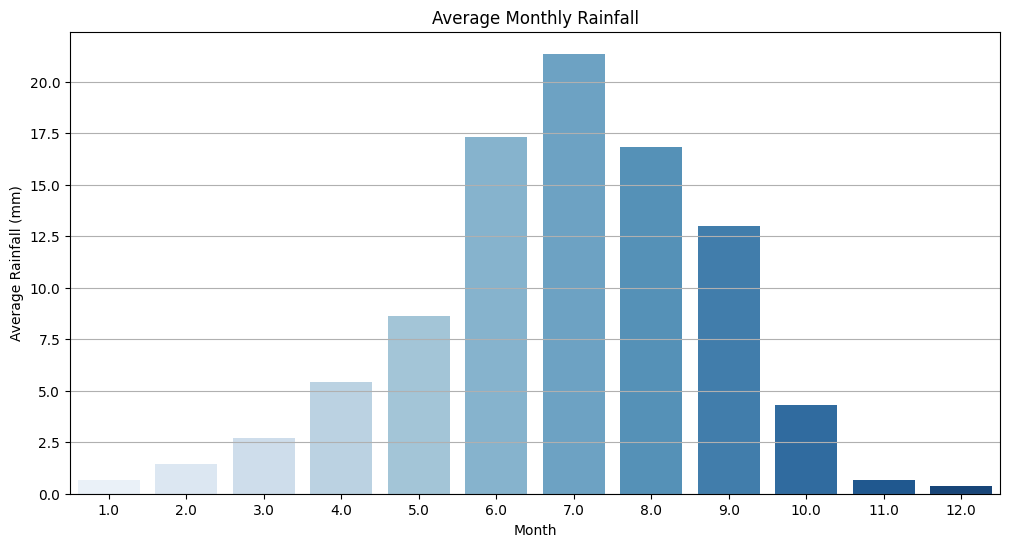

In [58]:
# Monthly and Seasonal Rainfall
monthly_rainfall = data.groupby("Month")["Rainfall (in mm)"].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall")
plt.grid(axis="y")
plt.show()

In [59]:
# Identify Continuous Rainfall Days
df_sorted = data.sort_values(by=["Location", "Date"])
df_sorted["Rain_Streak"] = (df_sorted["Rainfall (in mm)"] > 0).astype(int)
df_sorted["Rain_Streak"] = df_sorted.groupby("Location")["Rain_Streak"].cumsum()
rain_streaks = df_sorted.groupby(["Location", "Rain_Streak"])["Date"].count().reset_index()
rain_streaks = rain_streaks[rain_streaks["Date"] >= 5]  # Filter for at least 5 continuous days

# Display locations with longest continuous rainy periods
rain_streaks_sorted = rain_streaks.sort_values(by="Date", ascending=False)
print(rain_streaks_sorted.head(10))

       Location  Rain_Streak  Date
124343    Loc_2        27288   201
244953    Loc_6        16773   175
119261    Loc_2        22206   175
344322    Loc_9        16436   175
288851    Loc_7        27484   163
188773    Loc_4        27649   163
155854    Loc_3        27535   163
118529    Loc_2        21474   163
91523    Loc_10        27018   163
355382    Loc_9        27496   163


In [39]:
data.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,class,Year-Month-Day
0,1901-01-01,Day_1,1901.0,1.0,Loc_0,3.0,27.25,88.25,1.0,1,1901-01-01
1,1901-01-02,Day_2,1901.0,1.0,Loc_0,8.0,27.25,88.25,1.0,1,1901-01-02
2,1901-01-03,Day_3,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-03
3,1901-01-04,Day_4,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-04
4,1901-01-05,Day_5,1901.0,1.0,Loc_0,0.0,27.25,88.25,1.0,0,1901-01-05


In [60]:
data["Month"] = data["Month"].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17796\3350853181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].astype(int)


In [61]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,Loc_0,2633.0
1,1,Loc_1,2609.0
2,1,Loc_10,3829.4
3,1,Loc_2,2141.2
4,1,Loc_3,4365.4
...,...,...,...
127,12,Loc_5,1853.0
128,12,Loc_6,2045.2
129,12,Loc_7,1968.0
130,12,Loc_8,1995.0


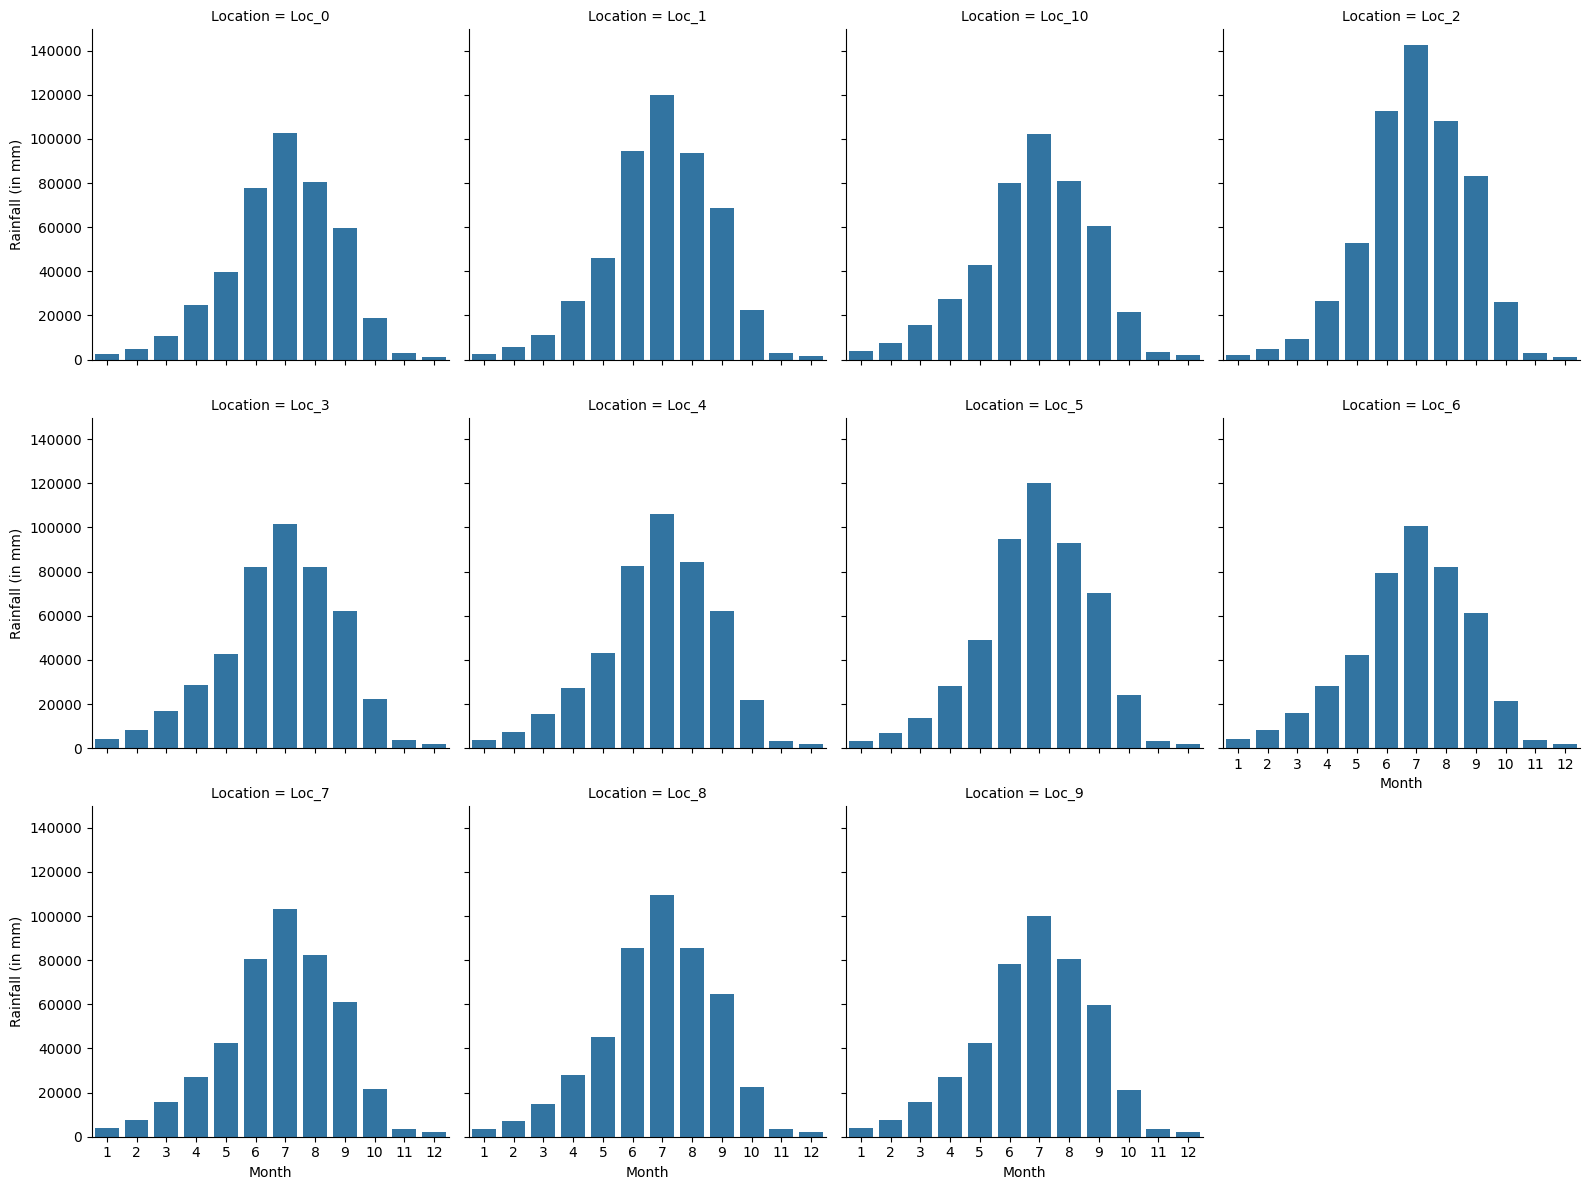

In [65]:
g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

**These are the trends followed by each location every month over 122 year**

In [1]:
import folium

m = folium.Map(location=(27.25,88.25))


In [6]:
folium.Marker(
    location=[27.25, 88.25],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)
folium.Marker(
    location=[27.25, 88.75],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.5, 88.25],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.5, 88.5],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.5, 88.75],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.75, 88.25],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.75, 88.5],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[27.75, 88.75],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[28, 88.5],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[28, 88.75],
    tooltip="Click me!",
    popup="Rainfall Region",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

m